In [2]:
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import humanize
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [3]:
fname_runtime =  "results/distance/performance_measures/runtime.csv"

In [4]:
method_palette = { "LoFreq": "#9593D9",
                   "ShoRAH": "#ffe66d",
                   "CliqueSNV":  "#4ecdc4",
                   "VILOCA": "#ff6b6b",
                   "ground_truth": "grey",
                  "ground truth": "grey",
                  "PredictHaplo": "#227c9d",
                  }

mapping_methods = {
    'cliquesnv_local_haplo_snv_tf0.01': "CliqueSNV",
    'cliquesnv_local_haplo_snv': "CliqueSNV",
    'cliquesnv_local_haplo_tf0.01': "CliqueSNV",
    'cliquesnv_local_haplo': "CliqueSNV",
    'shorah_default': 'ShoRAH',
    'lofreq_local_haplo': 'LoFreq',
    'viloca_alpha_0.00001': 'VILOCA',
    'viloca_alpha_0.00001_K100': 'VILOCA',
    'viloca_multi': 'VILOCA',
    'ground_truth': "ground truth",
    'predicthaplo_local_haplo': 'PredictHaplo'
}

In [5]:
mapping_haplos = {
    '2@3@30@20@20@geom@0.75': 'Population 1', 
    '5@5@30@10@15@geom@0.75': 'Population 2',
    '5@10@30@10@10@geom@0.75': 'Population 3', 
    '5@15@30@10@15@geom@0.75': 'Population 4', 
    
    '2@3@600@400@400@geom@0.75': 'Population 5',
    '2@3@600@600@600@geom@0.75': 'Population 6',
    '5@5@600@200@300@geom@0.75': 'Population 7', 
    '5@10@600@200@240@geom@0.75': 'Population 8',
}

## runtime plots

In [7]:
df = pd.read_csv(fname_runtime)
df.loc[:,'coverage'] = df['params'].str.split('~').str[6].str.split('__').str[0]
df.loc[:, 'haplos'] = df['params'].str.split('~').str[7].str.split('\n').str[0]
df.loc[:, 'seq_tech'] = df['params'].str.split('~').str[1].str.split('__').str[0]

df = df[df['method'].isin(mapping_methods.keys())]
df["Method"] = df['method'].apply(lambda x: mapping_methods[x])


In [8]:
df[df['Method']=='LoFreq'].sort_values('value')

,Unnamed: 0,method,params,replicate,variable,value,coverage,haplos,seq_tech,Method
59,59,lofreq_local_haplo,seq\ntech~illumina\n\nseq\nmode~shotgun\n\nseq...,0,s,0.9461,200\n\nhaplos,5@5@30@10@15@geom@0.75,illumina\n\nseq\nmode,LoFreq
63,63,lofreq_local_haplo,seq\ntech~illumina\n\nseq\nmode~shotgun\n\nseq...,4,s,1.0466,200\n\nhaplos,5@5@30@10@15@geom@0.75,illumina\n\nseq\nmode,LoFreq
86,86,lofreq_local_haplo,seq\ntech~illumina\n\nseq\nmode~shotgun\n\nseq...,2,s,1.3214,500\n\nhaplos,5@5@30@10@15@geom@0.75,illumina\n\nseq\nmode,LoFreq
87,87,lofreq_local_haplo,seq\ntech~illumina\n\nseq\nmode~shotgun\n\nseq...,3,s,1.4040,500\n\nhaplos,5@5@30@10@15@geom@0.75,illumina\n\nseq\nmode,LoFreq
235,235,lofreq_local_haplo,seq\ntech~illumina\n\nseq\nmode~shotgun\n\nseq...,1,s,1.7906,1000\n\nhaplos,5@10@30@10@10@geom@0.75,illumina\n\nseq\nmode,LoFreq
...,...,...,...,...,...,...,...,...,...,...
692,692,lofreq_local_haplo,seq\ntech~nanopore\n\nseq\nmode~shotgun\n\nseq...,0,s,1710.4339,10000\n\nhaplos,2@3@600@600@600@geom@0.75,nanopore\n\nseq\nmode,LoFreq
696,696,lofreq_local_haplo,seq\ntech~nanopore\n\nseq\nmode~shotgun\n\nseq...,4,s,1760.8780,10000\n\nhaplos,2@3@600@600@600@geom@0.75,nanopore\n\nseq\nmode,LoFreq
694,694,lofreq_local_haplo,seq\ntech~nanopore\n\nseq\nmode~shotgun\n\nseq...,2,s,1798.8014,10000\n\nhaplos,2@3@600@600@600@geom@0.75,nanopore\n\nseq\nmode,LoFreq
693,693,lofreq_local_haplo,seq\ntech~nanopore\n\nseq\nmode~shotgun\n\nseq...,1,s,1861.9009,10000\n\nhaplos,2@3@600@600@600@geom@0.75,nanopore\n\nseq\nmode,LoFreq


In [16]:
df[df['Method']=='PredictHaplo']['value'].max()
34863.359/60/60

9.684266388888888

In [9]:
df[df['Method']=='CliqueSNV']['value'].max() # = 359.0311111 Stunden
359/24 # --> nearly 15 days

14.958333333333334

In [10]:
15*24 - 359

1

In [17]:
df[df['Method']=='CliqueSNV']['value'].max()

1292512.3887

In [11]:
90682.6410

90682.641

/var/folders/dw/8dl4p6h53cgcmk6cf_09v5f40000gr/T/ipykernel_4085/3553202358.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.ax.set_yticklabels([datetime.timedelta(seconds=ti) for ti in ticks])


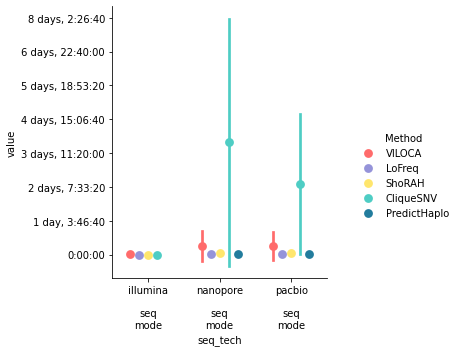

In [12]:
import time

g = sns.catplot(
        data=df,
        x="seq_tech",
        y="value",
        hue="Method",
        kind="point",
        legend=True, 
        sharex=True,
        sharey=False,
        linestyles='', 
        margin_titles=True,
        palette=method_palette,
        hue_order=['VILOCA', 'LoFreq', 'ShoRAH', 'CliqueSNV', 'PredictHaplo'],
        #width=0.5,
        #linewidth=0.2,
        dodge=0.5,
        errorbar='sd'
    )

# set your date formatter whit this format '%H:%M'
#formatter = time.strftime('%H:%M:%S', time.gmtime)
#g.ax.yaxis.set_major_formatter(formatter)
ticks = g.ax.get_yticks()
#g.ax.set_yticklabels(pd.to_datetime(ticks, unit='s').strftime('%H:%M:%S'))

import datetime
#str(datetime.timedelta(seconds=666))
g.ax.set_yticklabels([datetime.timedelta(seconds=ti) for ti in ticks])

g.tight_layout()

In [13]:
g.savefig('distance__runtime.svg')